<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/LinearRegression/LinearRegression_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression- Startups

**Context:**

In the competitive startup landscape, achieving profitability requires strategic resource allocation. Key financial decisions related to R&D, administration, and marketing, coupled with the influence of the operating state, significantly impact a startup's bottom line.

**Objective:**

Develop a predictive model that forecasts startup profitability based on R&D spending, administration costs, marketing investments, and state. This data-driven tool will empower startups to optimize resource allocation and strategic planning, ultimately enhancing their chances of success.

**Data Dictionary:**

* R&D Spend: The amount spent on research and
 development.
*Administration: The amount spent on
 administration.
* Marketing Spend: The amount spent on marketing.
 State: The state in which the startup operates (e.g., New York, California, Florida).
* Profit: The profit earned by the startup.

#Importing necessary libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Loading dataset


In [4]:
df=pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

**There are 50 rows and 5 columns.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**All the columns are in correct datatypes.**

In [7]:
# Checking for Nukk values
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


**There are no null values**

In [8]:
#Checking for duplicates
df.duplicated().sum()

np.int64(0)

**There are no duplicate values.**


# Summary Statistics

In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**Observations:**
* We can observe that for R&D spend Administration, Marketing Spend columns mean and median is almost same, implying the distribution is symmetric.

* For colum Profit mean is greater mean is slightly greater than median, implying there may be a few outliers in the right tail.

In [10]:
df.describe(include='object')

,State
count,50
unique,3
top,New York
freq,17


**Observatoins:**

There are 3 unique values in the state column. Hightest number of statups are in the New York state.

In [12]:
#Grouping state and profit
df.groupby('State')['Profit'].mean().sort_values(ascending=False)


,Profit
State,
Florida,118774.024375
New York,113756.446471
California,103905.175294


**Observations:**
* we can observe that startups in Florida has the highest average profit and California has lowest average of profit.

<Axes: xlabel='State'>

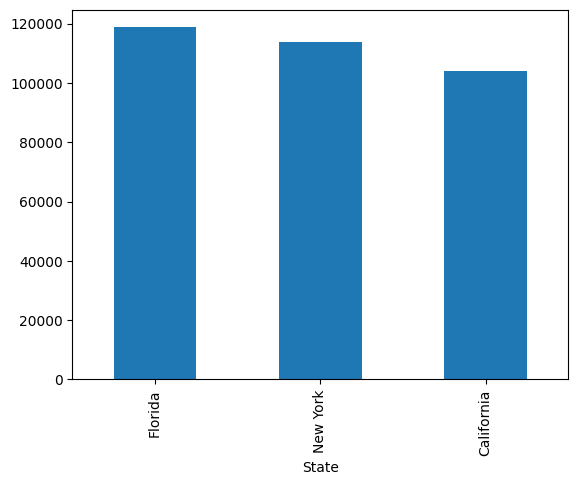

In [14]:
#Plot a barchart
df.groupby('State')['Profit'].mean().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='R&D Spend', ylabel='Profit'>

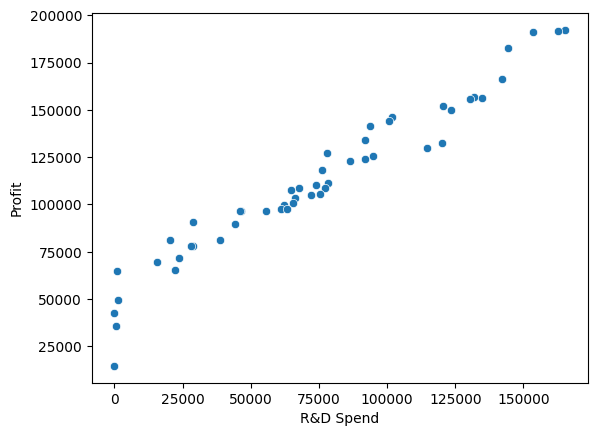

In [15]:
#Plot for R&D and profit
sns.scatterplot(x='R&D Spend',y='Profit',data=df)

**Observations:**

* We can observe that profit increases with increase in R&D spend.
* There is a linear relationship between R&D spend and profit.

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

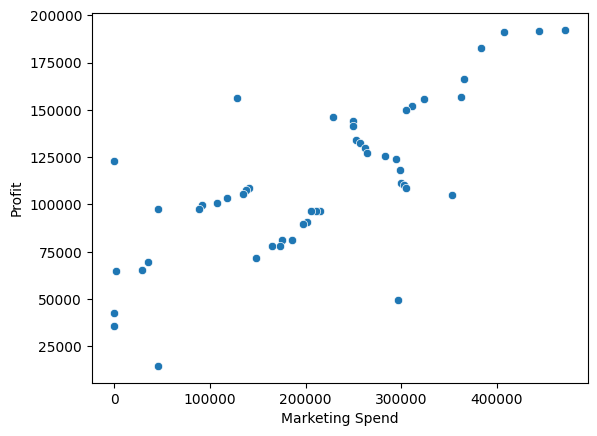

In [16]:
#Marketing and Profit
sns.scatterplot(x='Marketing Spend',y='Profit',data=df)

**Observations:**

The scatter plot suggests that there's a positive and potentially linear relationship between marketing spend and profit for startups.

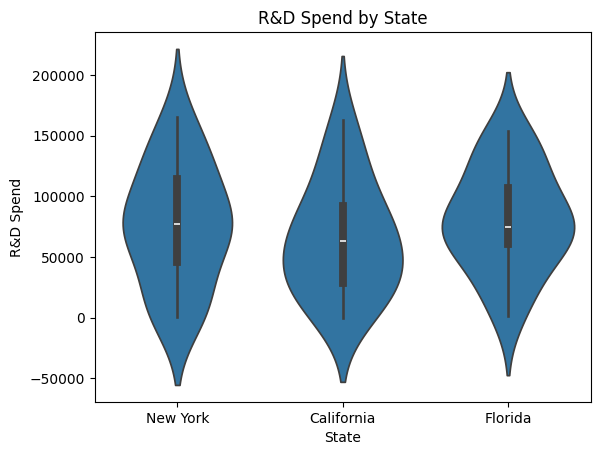

In [21]:
#R&D spend and state
sns.violinplot(x='State', y='R&D Spend', data=df)
plt.title('R&D Spend by State')
plt.xlabel('State')
plt.ylabel('R&D Spend')
plt.show()

In [22]:
#Grouping
df.groupby('State')['R&D Spend'].median().sort_values(ascending=False)

,R&D Spend
State,
New York,77044.010
Florida,74661.715
California,63408.860


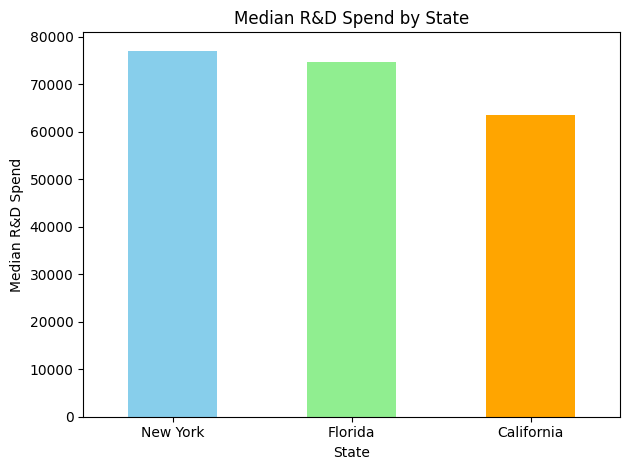

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate median R&D Spend by state and sort
median_rd_spend = df.groupby('State')['R&D Spend'].median().sort_values(ascending=False)

# Create a bar plot
median_rd_spend.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'])  # Customize colors
plt.title('Median R&D Spend by State')
plt.xlabel('State')
plt.ylabel('Median R&D Spend')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Observations:**

* New York has the highest median R&D spend, followed by Florida, and then California.
* This indicates that, on average, startups in New York invest more in R&D compared to those in other states.

# Correlation Analysis

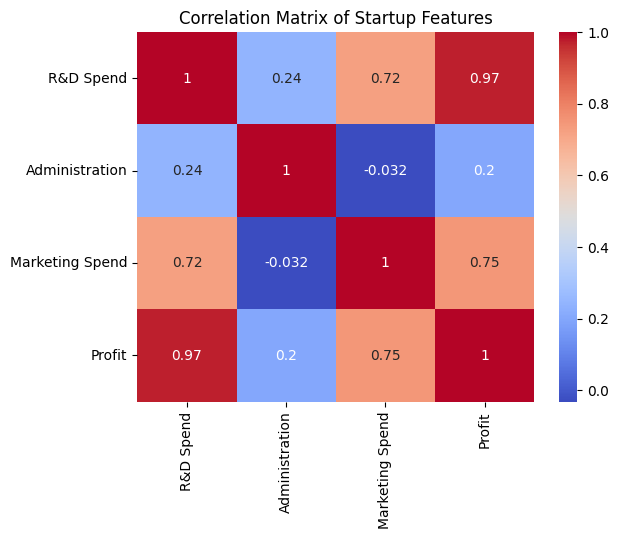

In [26]:
# Calculate the correlation matrix for numerical features only
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Startup Features')
plt.show()

**Observations:**
* There is a strong positive correlation between R&D Spend and Profit.
* Marketing Spend is positively correlated with R&D spend and Profit.
* There is a weak positive correlation between R&D spend and Administration.

# Model building

In [27]:
# Preprocessing
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [28]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [29]:
#Splitting the input features and target feature
X=df.drop('Profit',axis=1)
y=df['Profit']

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [32]:
#Splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Building Multiple linear Regression model

In [33]:
#Building a LinearRegression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
#Taking predictions from the trained model on training and testing data
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

print('Training R2_score:', np.round(r2_score(y_train,y_train_pred),2))
print('Testing R2_score:' ,np.round(r2_score(y_test,y_test_pred),2))

Training R2_score: 0.95
Testing R2_score: 0.9


**Conclusion:**

The model demonstrates high predictive accuracy for startup profitability, with an R2 of 0.95 on training data and 0.9 on testing data. This indicates its reliability for data-driven decision-making and resource allocation to maximize profit potential. While performing well, continued monitoring and refinement can further enhance its capabilities.